In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.datasets import load_iris

%matplotlib inline

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score


In [27]:
sample_size = 100
ages = np.random.randint(30, 60, sample_size)
genders = np.random.choice(["Male", "Female"], sample_size)
bp_levels = np.random.choice(["Low", "Normal", "High"], sample_size)
chol_levels = np.random.choice(["Low", "Normal", "High"], sample_size)
targets = np.random.choice(["Healthy", "Diseased"], sample_size)

data = {
    "Age": ages,
    "Gender": genders,
    "BP": bp_levels,
    "Chol": chol_levels,
    "Target": targets,
}

df: pd.DataFrame = pd.DataFrame(data)
df

,Age,Gender,BP,Chol,Target
0,44,Male,High,Normal,Healthy
1,49,Male,Normal,Normal,Healthy
2,34,Male,Normal,Low,Healthy
3,46,Male,Low,Low,Healthy
4,35,Female,Normal,High,Diseased
...,...,...,...,...,...
95,53,Female,Low,Normal,Healthy
96,51,Male,Low,Normal,Healthy
97,56,Female,Normal,Low,Diseased
98,40,Female,High,High,Healthy


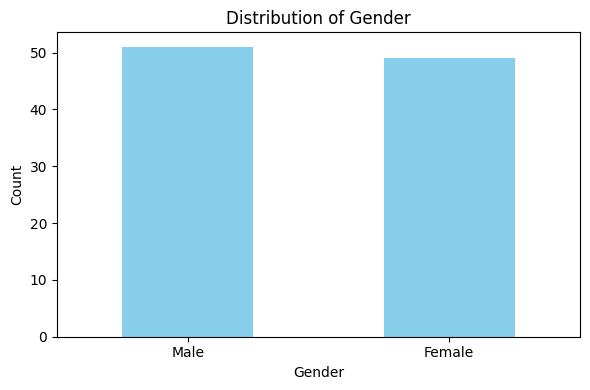

In [28]:
gender_counts = df["Gender"].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
gender_counts.plot(kind="bar", color="skyblue", ax=ax)
ax.set_title("Distribution of Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
X = df.drop(labels=["Target"], axis=1)
y = df['Target']

In [30]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=321)
X_train.shape, X_test.shape

((70, 4), (30, 4))

In [32]:
gender_categories = [df["Gender"].unique()]
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first", categories=gender_categories)

X_train["Gender"] = one_hot_encoder.fit_transform(X_train[["Gender"]])
X_test["Gender"] = one_hot_encoder.transform(X_test[["Gender"]])

In [33]:
bp_chol_categories = [X_train["BP"].unique(), df["Chol"].unique()]
ordinal_encoder = OrdinalEncoder(categories=bp_chol_categories)

X_train[["BP", "Chol"]] = ordinal_encoder.fit_transform(X_train[["BP", "Chol"]])
X_test[["BP", "Chol"]] = ordinal_encoder.transform(X_test[["BP", "Chol"]])

In [34]:
tree_clf = DecisionTreeClassifier(random_state=123)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

In [35]:
# Evaluate the model
train_score = tree_clf.score(X_train, y_train)
test_score = tree_clf.score(X_test, y_test)
model_accuracy_score = accuracy_score(y_test, y_pred)

Training Score: 1.0
Test Score: 0.4
Accuracy Score: 0.4


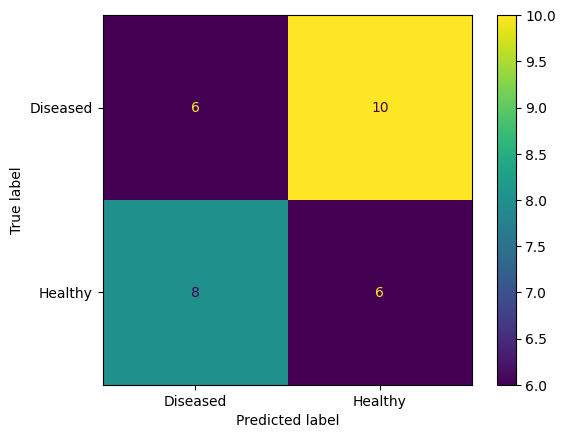

In [36]:
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Accuracy Score: {model_accuracy_score}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_).plot()
plt.show()

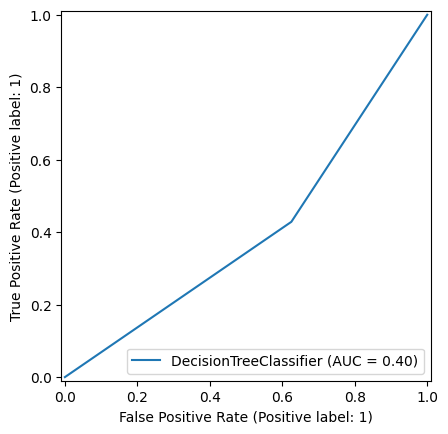

In [37]:
RocCurveDisplay.from_estimator(tree_clf, X_test, y_test)
plt.show()

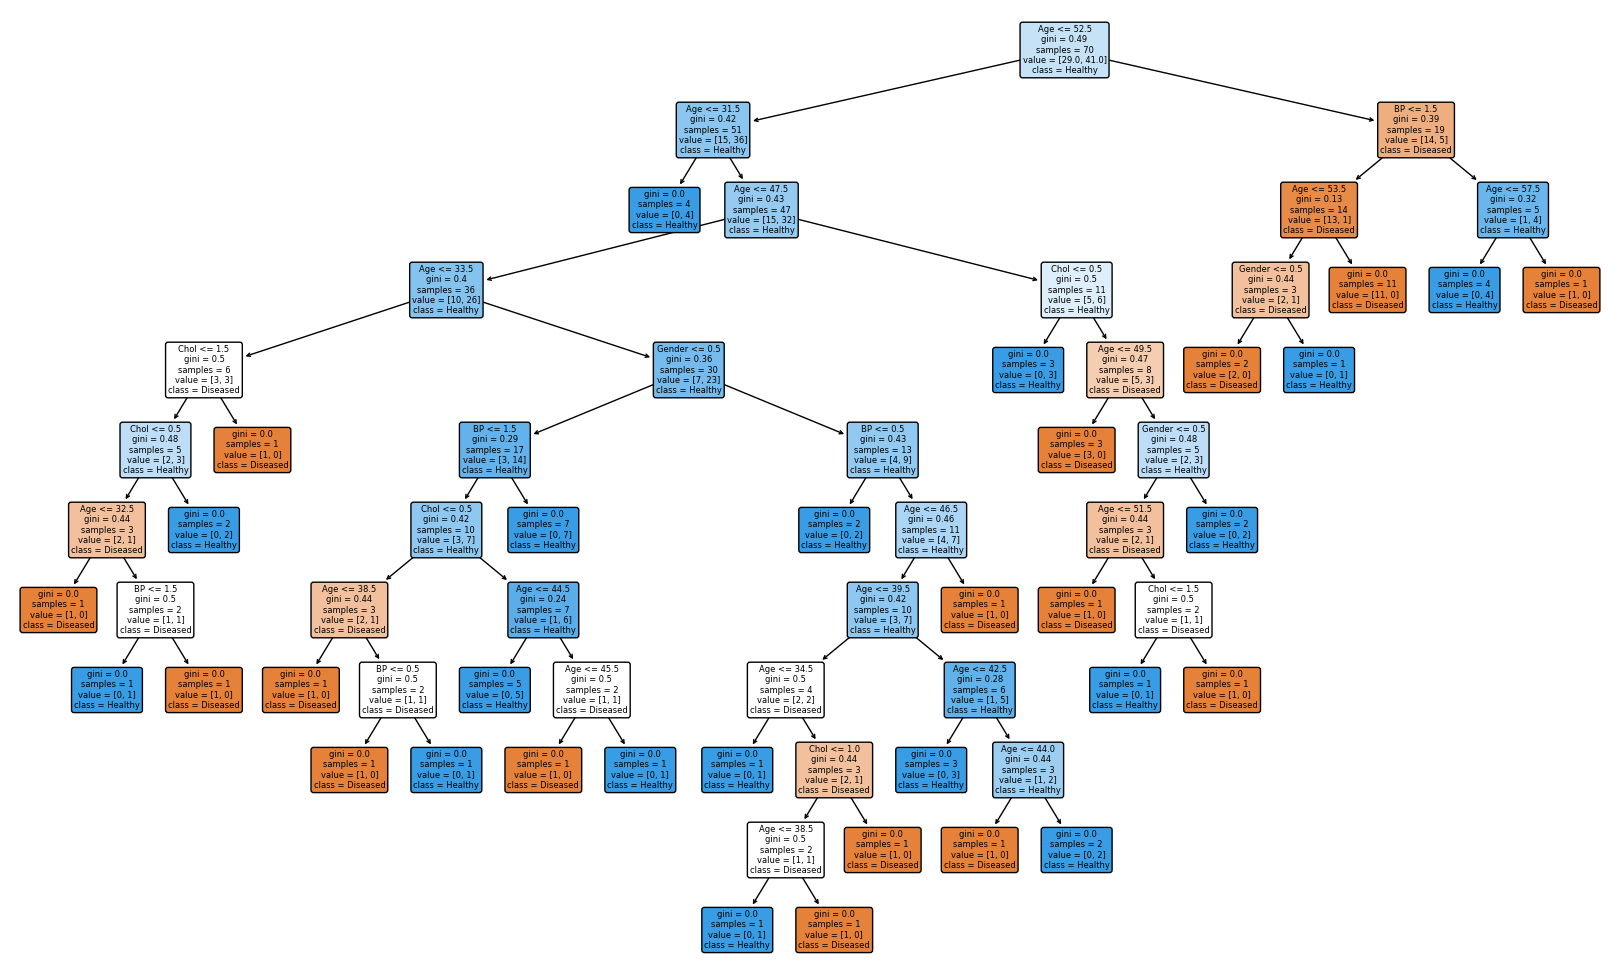

In [42]:
plt.figure(figsize=(20, 12))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=6, precision=2)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust margins around the plot
plt.show()

In [43]:
1**2

1

In [46]:
np.power(3, 2) - np.power(2,2)

5